In [1]:
from keras.datasets import mnist
from keras.models import Sequential,Model
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
(xtrain,_),(_,_) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(xtrain.shape)

(60000, 28, 28)


## NORMALIZE THE DATA

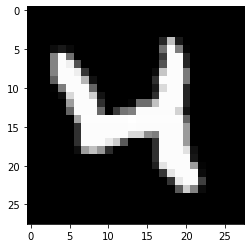

In [4]:
plt.imshow(xtrain[20],cmap='gray')
plt.show()

In [5]:
xtrain = (xtrain.astype('float32')-127.5)/127.5

In [21]:
total_epoch = 50
batch_size = 256
no_of_batches = int(xtrain.shape[0]/batch_size)
half_batch = 128
noise_dim = 100
adam = Adam(lr=2e-4,beta_1=0.5)

In [22]:
### lets define our generator 
### input noise (100,dim) and outputs vector (784,dim)

generator = Sequential()
generator.add(Dense(256,input_shape=(noise_dim,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))

generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 784)              

In [23]:
## time to build discriminator
## downsampling
discriminator = Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(128))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

In [24]:
### implementating GAN
discriminator.trainable =False
gan_input = Input(shape=(noise_dim,))
gen_img = generator(gan_input)
gan_output = discriminator(gen_img)

### using functional api
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

In [10]:
xtrain = xtrain.reshape(-1,784)
print(xtrain.shape)

(60000, 784)


In [13]:
import os 
os.mkdir('images')

In [14]:
!ls

images	sample_data


In [25]:
def save_imgs(epoch,samples=100):
    
    noise = np.random.normal(0,1,size=(samples,noise_dim))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis("off")
        
    plt.tight_layout()
    plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()

Epoch 1 Disc Loss 0.6221 Generator Loss 0.9604
Epoch 2 Disc Loss 0.6351 Generator Loss 1.1209
Epoch 3 Disc Loss 0.6203 Generator Loss 1.1645
Epoch 4 Disc Loss 0.5888 Generator Loss 1.3078
Epoch 5 Disc Loss 0.5594 Generator Loss 1.4082


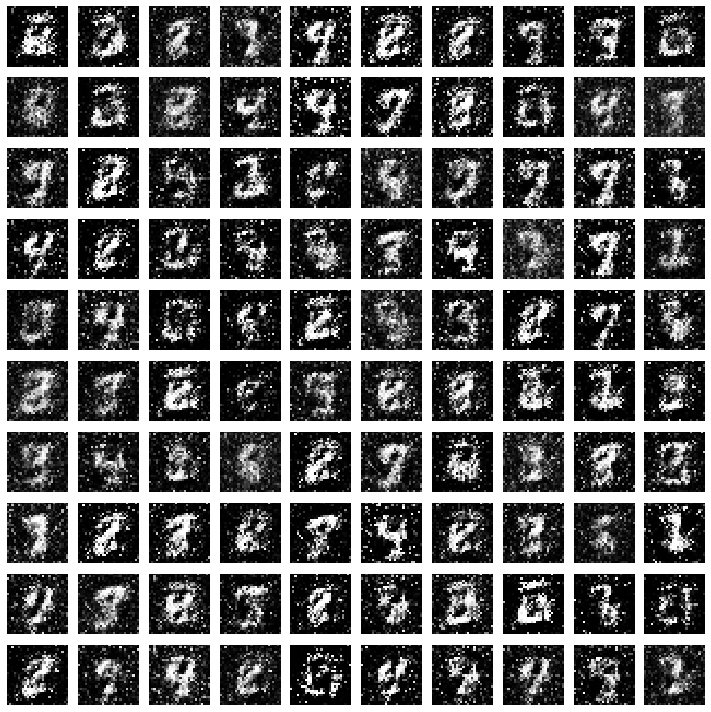

Epoch 6 Disc Loss 0.5539 Generator Loss 1.4634
Epoch 7 Disc Loss 0.5867 Generator Loss 1.3427
Epoch 8 Disc Loss 0.6147 Generator Loss 1.2125
Epoch 9 Disc Loss 0.6151 Generator Loss 1.2002
Epoch 10 Disc Loss 0.6125 Generator Loss 1.1998


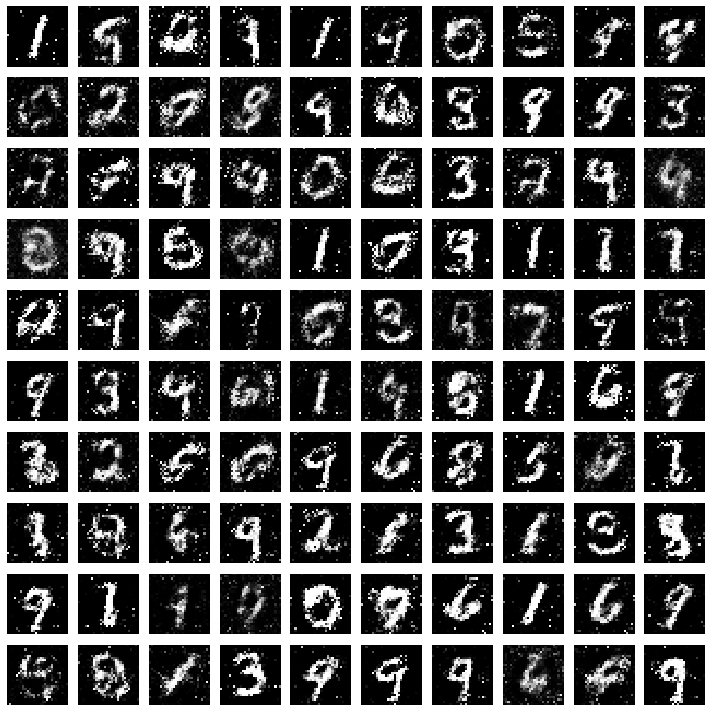

Epoch 11 Disc Loss 0.6147 Generator Loss 1.1921
Epoch 12 Disc Loss 0.6113 Generator Loss 1.1950
Epoch 13 Disc Loss 0.6103 Generator Loss 1.2339
Epoch 14 Disc Loss 0.6131 Generator Loss 1.2065
Epoch 15 Disc Loss 0.6068 Generator Loss 1.2231


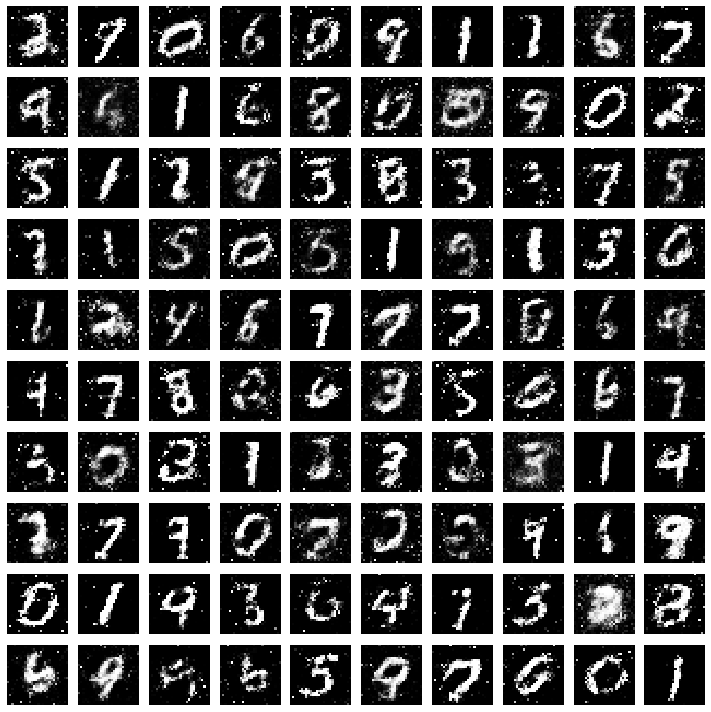

Epoch 16 Disc Loss 0.6077 Generator Loss 1.2348
Epoch 17 Disc Loss 0.6064 Generator Loss 1.2349
Epoch 18 Disc Loss 0.6137 Generator Loss 1.2257
Epoch 19 Disc Loss 0.6158 Generator Loss 1.2195
Epoch 20 Disc Loss 0.6134 Generator Loss 1.2097


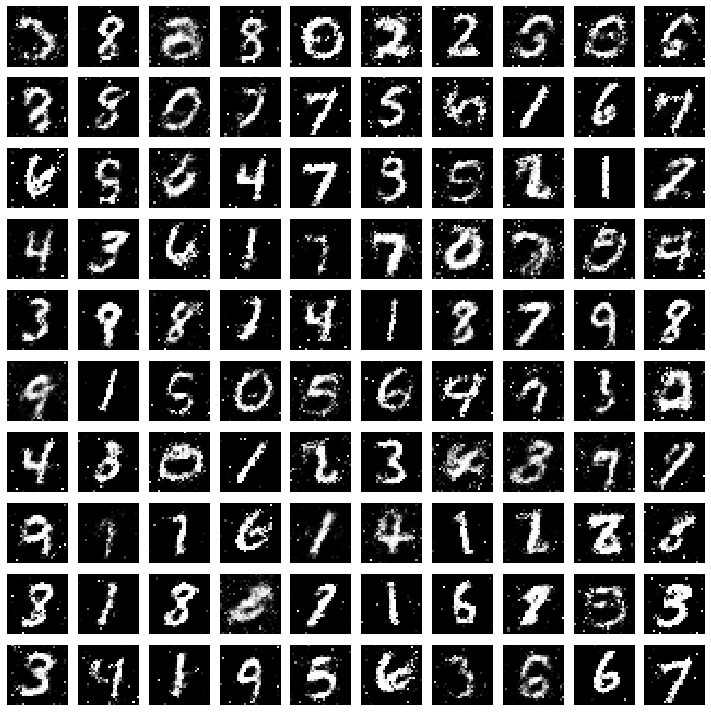

Epoch 21 Disc Loss 0.6143 Generator Loss 1.2210
Epoch 22 Disc Loss 0.6134 Generator Loss 1.2197
Epoch 23 Disc Loss 0.6116 Generator Loss 1.2242
Epoch 24 Disc Loss 0.6108 Generator Loss 1.2361
Epoch 25 Disc Loss 0.6103 Generator Loss 1.2442


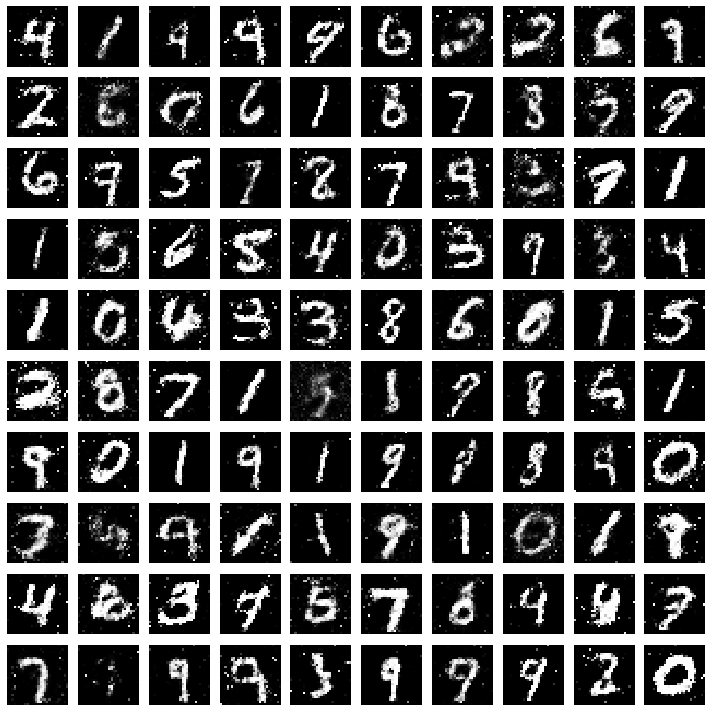

Epoch 26 Disc Loss 0.6086 Generator Loss 1.2521
Epoch 27 Disc Loss 0.6084 Generator Loss 1.2481
Epoch 28 Disc Loss 0.6110 Generator Loss 1.2561
Epoch 29 Disc Loss 0.6096 Generator Loss 1.2445
Epoch 30 Disc Loss 0.6086 Generator Loss 1.2544


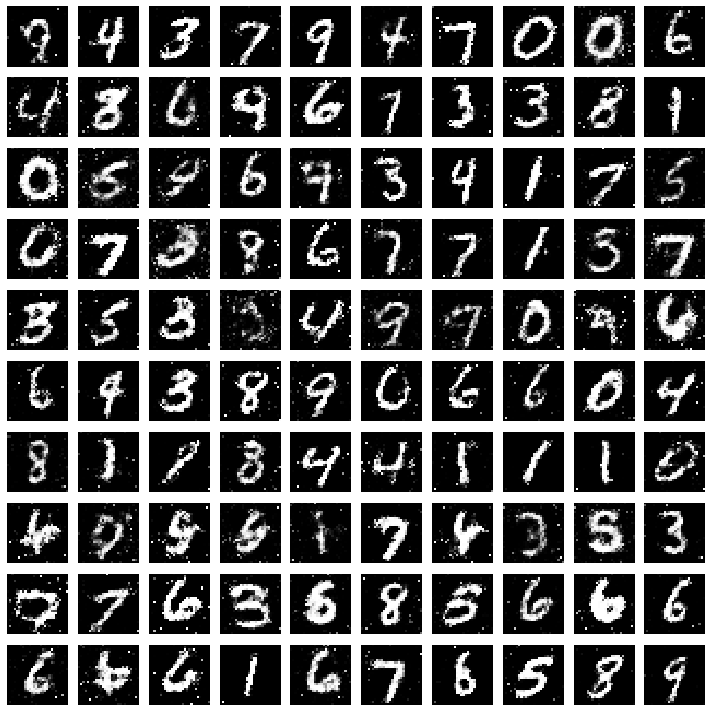

Epoch 31 Disc Loss 0.6107 Generator Loss 1.2566
Epoch 32 Disc Loss 0.6105 Generator Loss 1.2480
Epoch 33 Disc Loss 0.6102 Generator Loss 1.2564
Epoch 34 Disc Loss 0.6087 Generator Loss 1.2511
Epoch 35 Disc Loss 0.6067 Generator Loss 1.2665


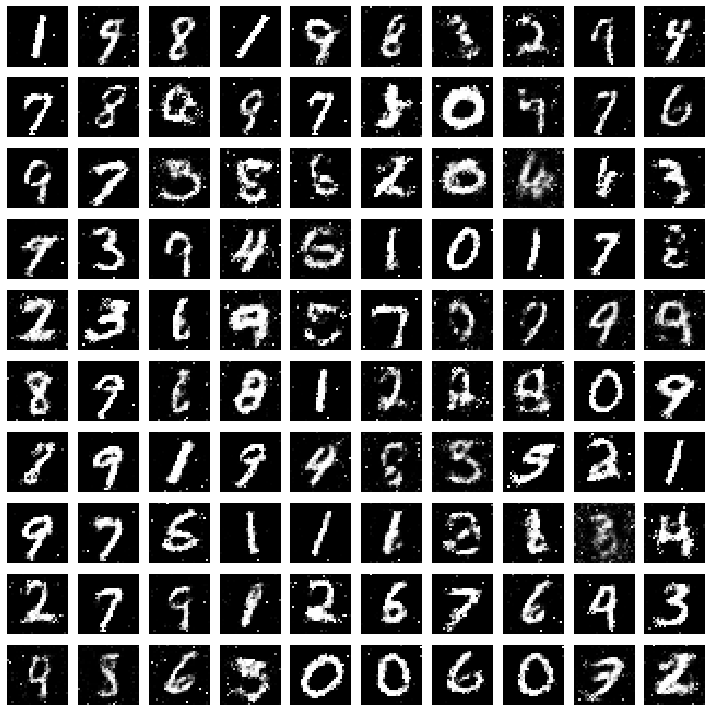

Epoch 36 Disc Loss 0.6089 Generator Loss 1.2543
Epoch 37 Disc Loss 0.6068 Generator Loss 1.2656
Epoch 38 Disc Loss 0.6076 Generator Loss 1.2690
Epoch 39 Disc Loss 0.6070 Generator Loss 1.2735
Epoch 40 Disc Loss 0.6067 Generator Loss 1.2733


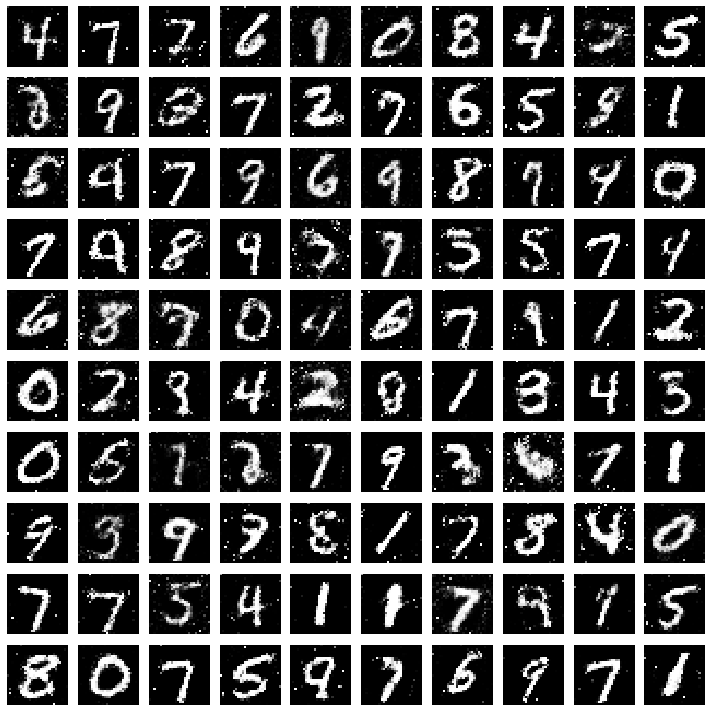

Epoch 41 Disc Loss 0.6085 Generator Loss 1.2637
Epoch 42 Disc Loss 0.6077 Generator Loss 1.2592
Epoch 43 Disc Loss 0.6104 Generator Loss 1.2737
Epoch 44 Disc Loss 0.6087 Generator Loss 1.2587
Epoch 45 Disc Loss 0.6078 Generator Loss 1.2681


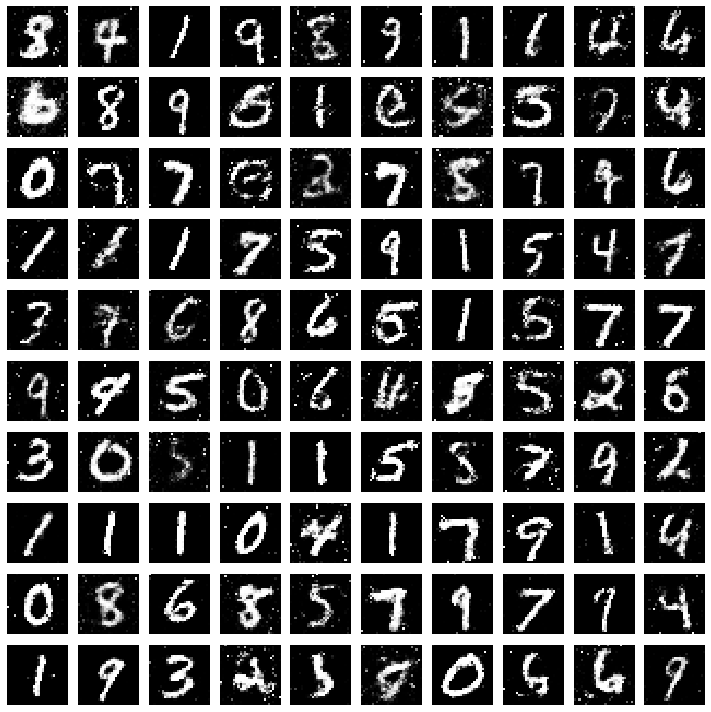

Epoch 46 Disc Loss 0.6074 Generator Loss 1.2719
Epoch 47 Disc Loss 0.6067 Generator Loss 1.2677
Epoch 48 Disc Loss 0.6057 Generator Loss 1.2733
Epoch 49 Disc Loss 0.6048 Generator Loss 1.2784
Epoch 50 Disc Loss 0.6047 Generator Loss 1.2893


In [ ]:
### training two step process

d_losses = []
g_losses = []


for epoch in range(total_epoch):
  epoch_d_loss = 0.
  epoch_g_loss = 0.
  ### mini batch SGD
  for step in range(no_of_batches):
    ## train the discriminator
    ## 50% real data
    idx = np.random.randint(0,xtrain.shape[0],half_batch)
    real_img = xtrain[idx]

    ## 50% fake data
    noise = np.random.normal(0,1,size=(half_batch,noise_dim))
    fake_img = generator.predict(noise)


    ## labels
    real_y = np.ones((half_batch,1))*0.9 # real otput
    fake_y = np.zeros((half_batch,1))

    ## train our discriminator
    real_loss = discriminator.train_on_batch(real_img,real_y)
    fake_loss = discriminator.train_on_batch(fake_img,fake_y)
    d_loss = 0.5*real_loss+0.5*fake_loss
    #print("d_loss {}".format(d_loss))
    epoch_d_loss += d_loss

    ## train our generator
    noise = np.random.normal(0,1,size=(half_batch,noise_dim))
    ground_truth = np.ones((half_batch,1))

    g_loss = model.train_on_batch(noise,ground_truth)
    #print("g_loss {}".format(g_loss))
    epoch_g_loss += g_loss
  print("Epoch %d Disc Loss %.4f Generator Loss %.4f" %((epoch+1),epoch_d_loss/no_of_batches,epoch_g_loss/no_of_batches))
  d_losses.append(epoch_d_loss/no_of_batches)
  g_losses.append(epoch_g_loss/no_of_batches)

  if (epoch+1)%5==0:
    generator.save('images/gan_generator_{0}.h5'.format(epoch+1))
    save_imgs(epoch)
    









  

